In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-08-11 13:35:46.649820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 13:35:46.649965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 13:35:46.805353: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/ecg-dataset/ecg.csv


In [10]:
df = pd.read_csv('/kaggle/input/ecg-dataset/ecg.csv')

In [11]:
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [12]:
df['1.0'].unique()

array([1., 0.])

In [13]:
df['1.0'].value_counts()

1.0
1.0    2918
0.0    2079
Name: count, dtype: int64

In [14]:
df_normal = df[df['1.0'] == 0.0]
df_normal.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
291,-0.032245,-0.545050,-0.822340,-1.605085,-1.805775,-2.008067,-2.233975,-2.191458,-2.058071,-1.880849,...,-1.621376,-2.329090,-3.049894,-3.620413,-4.210482,-4.043785,-3.051813,-2.806866,-0.879666,0.0
292,-0.003377,-0.279265,-0.230519,-0.635978,-0.894795,-1.023105,-1.243738,-1.458372,-1.677896,-1.784530,...,-2.640508,-3.218384,-3.651630,-3.881198,-3.924672,-3.164390,-2.228373,-1.837544,-0.378489,0.0
293,0.195989,-0.222258,-0.754773,-1.415614,-1.775851,-2.162326,-2.467492,-2.331384,-1.993476,-1.611709,...,-0.935030,-1.654340,-2.434240,-3.472170,-4.280780,-4.629438,-3.794192,-2.851468,-1.743521,0.0
294,0.894867,-0.003822,-0.751052,-1.396543,-1.737838,-2.113020,-2.213210,-2.203347,-2.024191,-1.591458,...,-1.441516,-1.861612,-2.321381,-2.884877,-3.530246,-4.412515,-3.903331,-3.567106,-1.536338,0.0
295,1.250060,0.760800,0.042925,-0.627974,-0.963454,-1.261335,-1.652440,-1.888433,-1.935217,-1.808429,...,-0.979223,-1.353969,-1.952051,-2.640386,-3.000281,-3.812490,-3.973360,-5.221946,-3.661793,0.0


In [15]:
df_abnormal = df[df['1.0'] == 1]
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [16]:
Scaler = MinMaxScaler()

# Using ANN
Try using a supervised learning technique (ANN) as we have labels for normal and abnormal ECG measurements. 
Will use unsupervised (Autencoder) and Time-Series (LSTM) models later on

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('1.0',axis=1),df['1.0'],test_size = 0.2,random_state = 42)
x_train.shape, y_train.shape

((3997, 140), (3997,))

In [18]:
x_test.shape, y_test.shape

((1000, 140), (1000,))

In [19]:
ann_model = keras.Sequential([
    keras.layers.Input((140,)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ann_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])

In [20]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        18,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,929 (113.00 KB)

 Trainable params: 28,929 (113.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Scaler = MinMaxScaler()


In [22]:
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.fit_transform(x_test)

x_train_scaled

array([[0.44697736, 0.35659258, 0.20675896, ..., 0.56064156, 0.43237814,
        0.25259386],
       [0.6137923 , 0.54922434, 0.36187056, ..., 0.69405843, 0.71189681,
        0.4665522 ],
       [0.57374989, 0.64600683, 0.62710965, ..., 0.19710951, 0.22991258,
        0.32874274],
       ...,
       [0.52592886, 0.3832573 , 0.13325148, ..., 0.67200199, 0.66184681,
        0.48123939],
       [0.47784547, 0.42018078, 0.29197847, ..., 0.19502515, 0.32160406,
        0.32009026],
       [0.45214905, 0.36593947, 0.18087446, ..., 0.66902461, 0.62724969,
        0.40850427]])

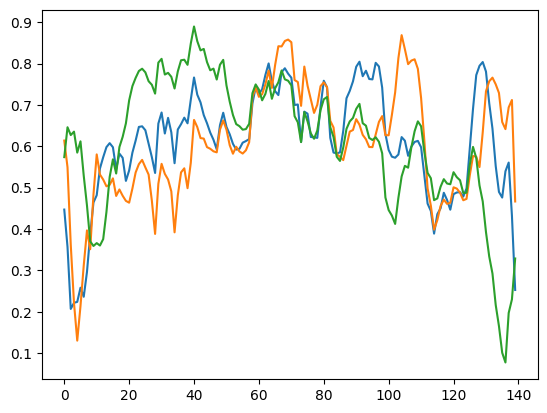

In [23]:
plt.plot(x_train_scaled[0])
plt.plot(x_train_scaled[1])
plt.plot(x_train_scaled[2])

In [26]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',patience = 2)
history = ann_model.fit(x_train_scaled,y_train,epochs=50)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.0230
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0248
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0181
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.0281
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.0190
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9949 - loss: 0.0226
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0272
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0252
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0202
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0150
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0274
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [27]:
ann_model.evaluate(x_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: 1.5893


[1.622025966644287, 0.9089999794960022]

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

As we can see the model is  overfitting the dataset. <br>
However this could be because we did not provide solid separations between abnormal and normal ECG data. The model gives us ~90% accuracy which is not very bad.

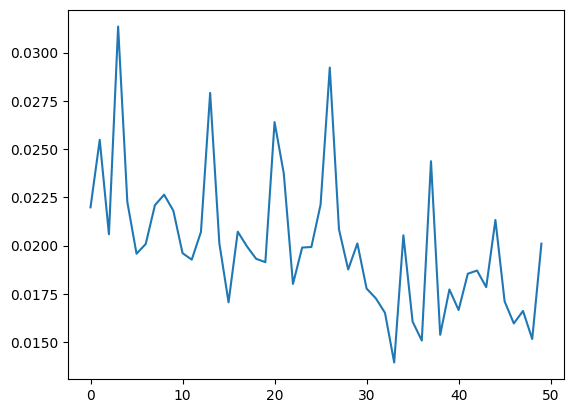

In [29]:
plt.plot(history.history['loss'])

# Using Autoencoder
in this section we will use the same dataframe and separate it into 2 different datasets based on the ECG result being normal/abnormal. This should help the AE model detect features and anomalies better.

In [30]:
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [31]:
df = df.add_prefix('c')
df.columns

Index(['c-0.11252183', 'c-2.8272038', 'c-3.7738969', 'c-4.3497511',
       'c-4.376041', 'c-3.4749863', 'c-2.1814082', 'c-1.8182865',
       'c-1.2505219', 'c-0.47749208',
       ...
       'c0.79216787', 'c0.93354122', 'c0.79695779', 'c0.57862066',
       'c0.2577399', 'c0.22807718', 'c0.12343082', 'c0.92528624',
       'c0.19313742', 'c1.0'],
      dtype='object', length=141)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df,df['c1.0'],test_size=0.2,random_state=111)
x_train.shape

(3997, 141)

In [33]:
x_train.columns

Index(['c-0.11252183', 'c-2.8272038', 'c-3.7738969', 'c-4.3497511',
       'c-4.376041', 'c-3.4749863', 'c-2.1814082', 'c-1.8182865',
       'c-1.2505219', 'c-0.47749208',
       ...
       'c0.79216787', 'c0.93354122', 'c0.79695779', 'c0.57862066',
       'c0.2577399', 'c0.22807718', 'c0.12343082', 'c0.92528624',
       'c0.19313742', 'c1.0'],
      dtype='object', length=141)

In [34]:
def convert(num):
        return int(num)

convert(2.3)

2

In [36]:
x_test['label'] = x_test['c1.0'].apply(convert)
x_train['label'] = x_train['c1.0'].apply(convert)

In [37]:
x_train['label'].dtype

dtype('int64')

In [38]:
y_train

2509    1.0
1688    1.0
1492    1.0
4408    0.0
2748    1.0
       ... 
681     1.0
4182    0.0
4820    0.0
2004    1.0
3924    0.0
Name: c1.0, Length: 3997, dtype: float64

In [39]:
y_train.dtype

dtype('float64')

In [40]:
x_train.columns

Index(['c-0.11252183', 'c-2.8272038', 'c-3.7738969', 'c-4.3497511',
       'c-4.376041', 'c-3.4749863', 'c-2.1814082', 'c-1.8182865',
       'c-1.2505219', 'c-0.47749208',
       ...
       'c0.93354122', 'c0.79695779', 'c0.57862066', 'c0.2577399',
       'c0.22807718', 'c0.12343082', 'c0.92528624', 'c0.19313742', 'c1.0',
       'label'],
      dtype='object', length=142)

In [41]:
x_train = x_train.drop(['c1.0'],axis=1)
x_test = x_test.drop('c1.0',axis=1)

In [42]:
x_train.head()

,c-0.11252183,c-2.8272038,c-3.7738969,c-4.3497511,c-4.376041,c-3.4749863,c-2.1814082,c-1.8182865,c-1.2505219,c-0.47749208,...,c0.79216787,c0.93354122,c0.79695779,c0.57862066,c0.2577399,c0.22807718,c0.12343082,c0.92528624,c0.19313742,label
2509,1.822091,0.414319,-1.440235,-2.618549,-3.922567,-3.783224,-2.707999,-1.855108,-1.775300,-0.913545,...,0.464975,1.049793,0.954076,1.635033,2.068029,2.286999,1.544730,1.022103,1.845322,1
1688,-1.261477,-3.558816,-4.074347,-4.127428,-3.670285,-2.929925,-1.605859,-0.978395,-0.738122,-0.124714,...,1.065147,0.877131,0.644057,0.517045,0.571512,0.821328,-0.473388,-2.488627,-4.306003,1
1492,-1.563111,-3.203775,-3.966596,-4.074541,-3.497598,-2.457369,-1.672536,-1.548824,-0.985259,-0.573304,...,1.352970,1.371968,1.243397,1.235607,1.097442,1.361982,1.172642,0.521523,-1.210595,1
4408,0.570357,-0.311379,-1.003933,-1.623887,-1.971990,-2.248033,-2.407499,-2.416430,-2.274649,-1.987445,...,-1.991470,-2.485589,-3.102903,-3.660368,-4.036994,-3.617250,-2.477106,-1.920645,-0.423067,0
2748,-0.795747,-2.689001,-3.740536,-4.641169,-4.251694,-3.019601,-1.580252,-1.459508,-1.001028,-0.150935,...,1.183599,1.432597,1.100761,0.400304,-0.395739,-0.438214,-0.307325,-0.743527,-3.015814,1


In [43]:
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.fit_transform(x_test)

In [44]:
x_train_normal = pd.DataFrame(x_train).add_prefix('c').query('c140==0.0').values[:,0:140]
x_train_normal.shape

(1652, 140)

In [45]:
x_train_abnormal = pd.DataFrame(x_train).add_prefix('c').query('c140>0').values[:,0:140]

In [46]:
x_train_abnormal.shape

(2345, 140)

In [47]:
x_test_normal = pd.DataFrame(x_test).add_prefix('c').query('c140==0.0').values[:,0:140]
x_test_abnormal = pd.DataFrame(x_test).add_prefix('c').query('c140>0.0').values[:,0:140]

In [48]:
x_test_normal.shape

(427, 140)

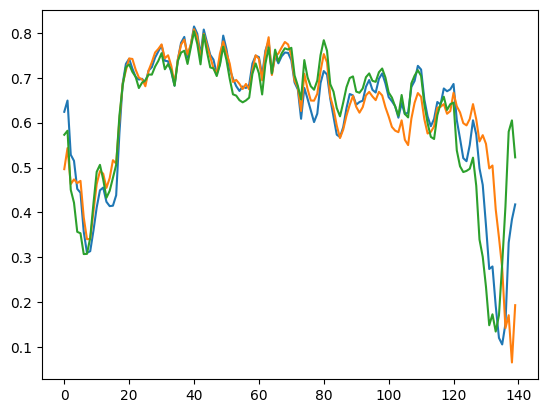

In [49]:
plt.plot(x_train_normal[0])
plt.plot(x_train_normal[1])
plt.plot(x_train_normal[2])

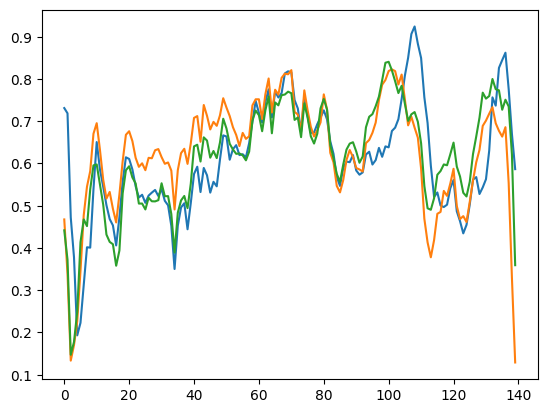

In [50]:
plt.plot(x_train_abnormal[0])
plt.plot(x_train_abnormal[1])
plt.plot(x_train_abnormal[2])

In [63]:
from keras import Model

class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(32,activation='relu'),
            keras.layers.Dense(16,activation='relu'),
            keras.layers.Dense(8,activation='relu')            
        ])
        self.decoder = keras.Sequential([             
            keras.layers.Dense(16,activation='relu'),
            keras.layers.Dense(32,activation='relu'),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(140,activation='sigmoid')    
        ])    #separate encoder and decoder units for reusability
        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [64]:
model = AutoEncoder()
model.compile(optimizer='adam',loss='mae',)

In [66]:
history = model.fit(x_train_normal,x_train_normal,
          epochs = 50,
          batch_size = 128,
          shuffle = True,
          validation_data = (x_train[:,:140],x_train[:,:140]),
          callbacks = [early_stop]
         )

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0310 - val_loss: 0.0650
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0296 - val_loss: 0.0644
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0297 - val_loss: 0.0644
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0296 - val_loss: 0.0645
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0299 - val_loss: 0.0637
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0293 - val_loss: 0.0634
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0289 - val_loss: 0.0634
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0289 - val_loss: 0.0638
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0292 - val_loss: 0.0627
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0293 - val_loss: 0.0625
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0279 - val_loss: 0.0633
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.02

In [68]:
encoded = model.encoder(x_test_normal).numpy()
decoded = model.decoder(encoded).numpy()

In [69]:
encoded.shape, decoded.shape

((427, 8), (427, 140))

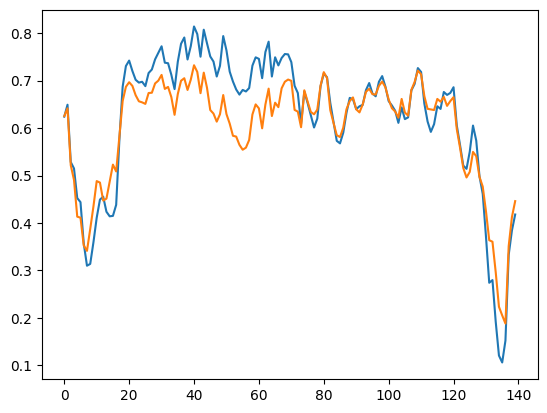

In [70]:
plt.plot(x_train_normal[0])
plt.plot(decoded[0])

In [71]:
encoded_new = model.encoder(x_test_abnormal).numpy()
decoded_new = model.decoder(encoded_new).numpy()

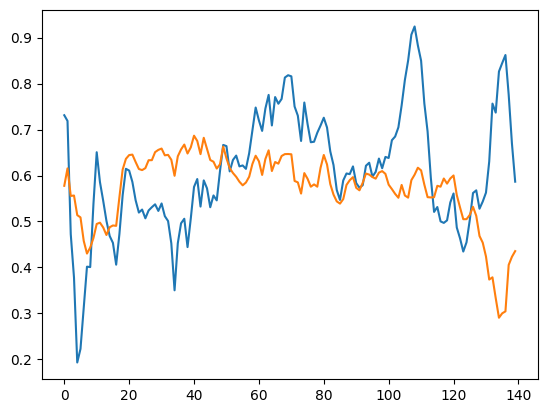

In [72]:
plt.plot(x_train_abnormal[0])
plt.plot(decoded_new[0])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


(array([13., 20., 47., 45., 46., 57., 43., 49., 31., 14.,  3., 10.,  5.,
         3.,  4.,  3.,  6.,  2.,  2.,  2.,  4.,  2.,  4.,  0.,  2.,  0.,
         3.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.09596662, 0.0990213 , 0.10207598, 0.10513066, 0.10818534,
        0.11124002, 0.1142947 , 0.11734938, 0.12040406, 0.12345874,
        0.12651342, 0.1295681 , 0.13262277, 0.13567745, 0.13873213,
        0.14178681, 0.14484149, 0.14789617, 0.15095085, 0.15400553,
        0.15706021, 0.16011489, 0.16316957, 0.16622425, 0.16927893,
        0.17233361, 0.17538829, 0.17844297, 0.18149765, 0.18455233,
        0.18760701, 0.19066169, 0.19371637, 0.19677105, 0.19982573,
        0.20288041, 0.20593509, 0.20898977, 0.21204445, 0.21509913,
        0.21815381, 0.22120849, 0.22426317, 0.22731785, 0.23037253,
        0.23342721, 0.23648189, 0.23953657, 0.24259125, 0.24564593,
        0.24870061]),
 <BarContainer

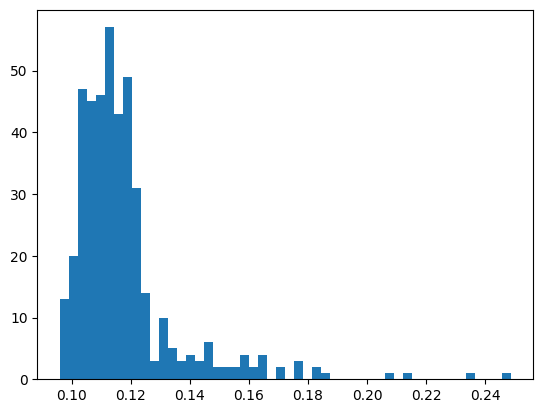

In [73]:
reconstructed = model.predict(x_test_normal)
loss = tf.keras.losses.mae(reconstructed,x_test_normal)
plt.hist(loss,bins=50)

In [83]:
threshold = np.mean(loss)
threshold

0.11772890856777965

In [84]:
reconstruction_anomaly= model.predict(x_test_abnormal)
loss_anomaly = tf.keras.losses.mae(reconstruction_anomaly,x_test_abnormal)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 2.,  3.,  6.,  5., 14., 34., 55., 56., 63., 50., 52., 40., 33.,
        29., 26., 24., 11., 12., 10.,  7.,  5.,  5.,  1.,  2.,  2.,  2.,
         2.,  2.,  2.,  0.,  3.,  3.,  0.,  1.,  0.,  4.,  1.,  1.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.10628378, 0.10888638, 0.11148899, 0.1140916 , 0.11669421,
        0.11929682, 0.12189942, 0.12450203, 0.12710464, 0.12970725,
        0.13230986, 0.13491247, 0.13751507, 0.14011768, 0.14272029,
        0.1453229 , 0.14792551, 0.15052811, 0.15313072, 0.15573333,
        0.15833594, 0.16093855, 0.16354116, 0.16614376, 0.16874637,
        0.17134898, 0.17395159, 0.1765542 , 0.1791568 , 0.18175941,
        0.18436202, 0.18696463, 0.18956724, 0.19216985, 0.19477245,
        0.19737506, 0.19997767, 0.20258028, 0.20518289, 0.20778549,
        0.2103881 , 0.21299071, 0.21559332, 0.21819593, 0.22079853,
        0.22340114, 0.22600375, 0.22860636, 0.23120897, 0.23381158,
        0.23641418]),
 <BarContainer

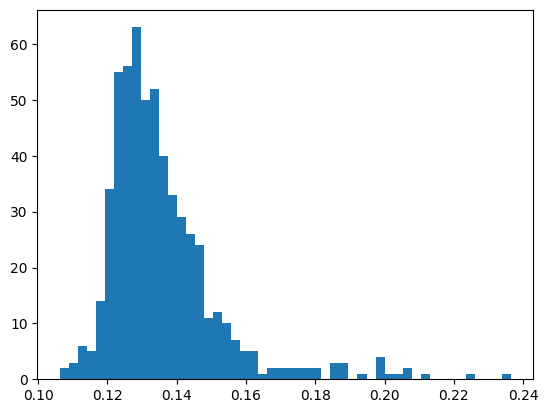

In [85]:
plt.hist(loss_anomaly,bins=50)

<function matplotlib.pyplot.show(close=None, block=None)>

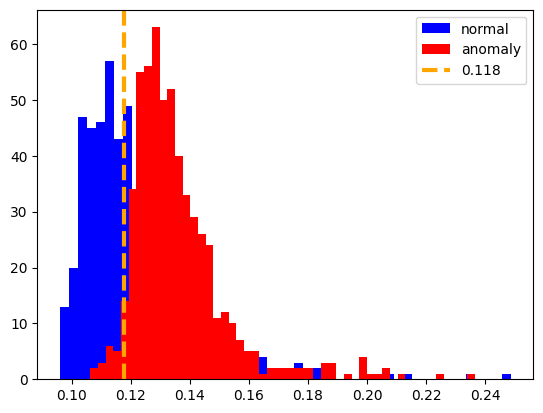

In [86]:
plt.hist(loss,bins=50,label='normal',color='b')
plt.hist(loss_anomaly,bins=50,label='anomaly',color='r')
plt.axvline(threshold,color='orange',linewidth=3,linestyle='dashed',label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show

As we can see in this histogram, the given dataset has ECG values where the abnormal and normal values arent too far off. This could be because of a fault in the AutoEncoder model or just extreme precision in the measurements. 

# Conclusion
All in all we can conclude that the AutoEncoder performs more or less the same when built using keras.Dense layers, as it behaves similarly to an Artificial Neural Network.<br>
The real merit of an AutoEncoder and its potential can be seen when we build it using LSTM cells so that it can capture the time series features of the ECG better.